In [1]:
from add_parent_dir import *
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
from ZX_dualities import *
from ZY_dualities import *
import pickle

## [[5,1,3]] - 5 qubit perfect code

$$S = \langle XZZXI, IXZZX, XIXZZ, ZXIXZ \rangle$$

#### Define code

In [2]:
n = 5
k = 1
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
print(H_symp)

[[1 0 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1]]


#### Automorphism group generators from MAGMA

In [3]:
qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/',save_magma_commands = True)
filename = f'./auts_data/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Run the commands on MAGMA online calculator.
Copy and save output as 'magma_output_n5k1d3.txt'


Press enter to continue... 



Aut Group Order:  360
Time:  0.02
No of aut gens:  5


In [4]:
auts = code_auts_dict['auts']
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = log_act.run()
    circuits.append(circ)
    symp_mats.append(log_act.U_logical_act())

In [5]:
filename = f'./auts_data/symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

## Circuit 1

Logical circuit on n qubits:


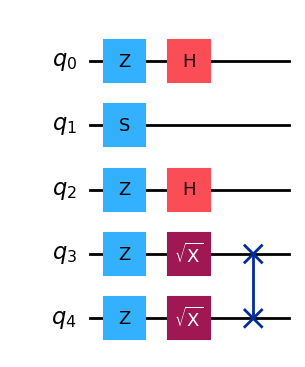

In [6]:
# physical circuit
circ = circuits[0]
print('Logical circuit on n qubits:')
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

Logical action on k qubits:


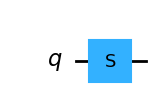

In [7]:
print('Logical action on k qubits:')
qc = construct_circuit(circ[0], k)
qc.draw(output='mpl')

## Circuit 2

Logical circuit on n qubits:


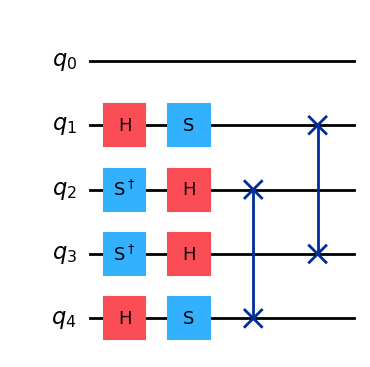

In [8]:
circ = circuits[1]
print('Logical circuit on n qubits:')
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

Logical action on k qubits:


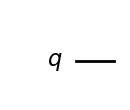

In [9]:
print('Logical action on k qubits:')
qc = construct_circuit(circ[0], k)
qc.draw(output='mpl')

## Circuit 3

Logical circuit on n qubits:


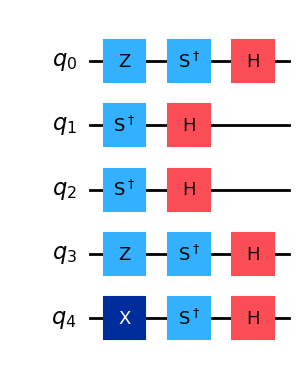

In [10]:
circ = circuits[2]
print('Logical circuit on n qubits:')
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

Logical action on k qubits:


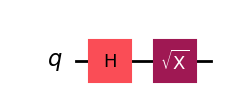

In [11]:
print('Logical action on k qubits:')
qc = construct_circuit(circ[0], k)
qc.draw(output='mpl')

## Circuit 4

Logical circuit on n qubits:


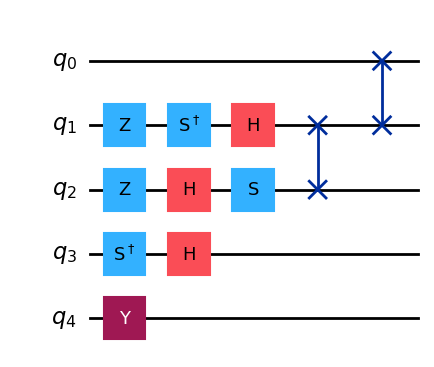

In [12]:
circ = circuits[3]
print('Logical circuit on n qubits:')
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

Logical action on k qubits:


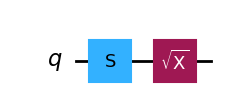

In [13]:
print('Logical action on k qubits:')
qc = construct_circuit(circ[0], k)
qc.draw(output='mpl')

## Circuit 5

Logical circuit on n qubits:


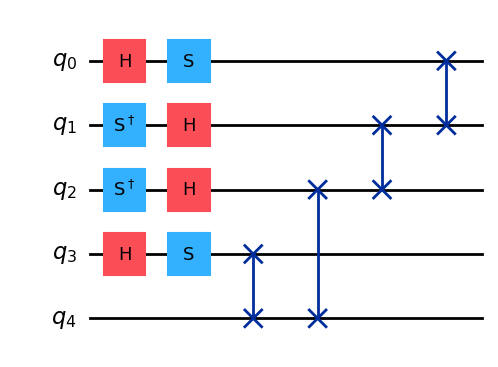

In [14]:
circ = circuits[4]
print('Logical circuit on n qubits:')
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

Logical action on k qubits:


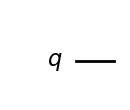

In [15]:
print('Logical action on k qubits:')
qc = construct_circuit(circ[0], k)
qc.draw(output='mpl')